## Data augmentation for Datascience bowl

this kernel is to generate rotation shear and fliping sample to make more sample for Deep learning model training.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import skimage.io
import matplotlib.pyplot as plt
from skimage import transform
%matplotlib inline 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input/"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

stage1_test
stage1_train



In [2]:
def read_image_labels(image_id):
    # most of the content in this function is taken from 'Example Metric Implementation' kernel 
    # by 'William Cukierski'
    image_file = "../input/stage1_train/{}/images/{}.png".format(image_id,image_id)
    mask_file = "../input/stage1_train/{}/masks/*.png".format(image_id)
    image = skimage.io.imread(image_file)
    masks = skimage.io.imread_collection(mask_file).concatenate()    
    height, width, _ = image.shape
    num_masks = masks.shape[0]
    labels = np.zeros((height, width), np.uint16)
    for index in range(0, num_masks):
        labels[masks[index] > 0] = index + 1
    return image, labels

In [3]:
def data_aug(image,label,angel=30,resize_rate=0.9):
    flip = random.randint(0, 1)
    size = image.shape[0]
    rsize = random.randint(np.floor(resize_rate*size),size)
    w_s = random.randint(0,size - rsize)
    h_s = random.randint(0,size - rsize)
    sh = random.random()/2-0.25
    rotate_angel = random.random()/180*np.pi*angel
    # Create Afine transform
    afine_tf = transform.AffineTransform(shear=sh,rotation=rotate_angel)
    # Apply transform to image data
    image = transform.warp(image, inverse_map=afine_tf,mode='edge')
    label = transform.warp(label, inverse_map=afine_tf,mode='edge')
    # Randomly corpping image frame
    image = image[w_s:w_s+size,h_s:h_s+size,:]
    label = label[w_s:w_s+size,h_s:h_s+size]
    # Ramdomly flip frame
    if flip:
        image = image[:,::-1,:]
        label = label[:,::-1]
    return image, label

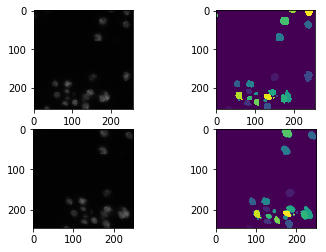

In [4]:
image_ids = check_output(["ls", "../input/stage1_train/"]).decode("utf8").split()
image_id = image_ids[0]
image, labels = read_image_labels(image_id)
plt.subplot(221)
plt.imshow(image)
plt.subplot(222)
plt.imshow(labels)

new_image, new_labels = data_aug(image,labels,angel=5,resize_rate=0.9)
plt.subplot(223)
plt.imshow(new_image)
plt.subplot(224)
plt.imshow(new_labels)

In [5]:
import os
import shutil
from tqdm import tqdm



def make_data_augmentation(image_ids,split_num):
    for ax_index, image_id in tqdm(enumerate(image_ids),total=len(image_ids)):
        image,labels = read_image_labels(image_id)
        if not os.path.exists("../input/stage1_train/{}/augs/".format(image_id)):
            os.makedirs("../input/stage1_train/{}/augs/".format(image_id))
        if not os.path.exists("../input/stage1_train/{}/augs_masks/".format(image_id)):
            os.makedirs("../input/stage1_train/{}/augs_masks/".format(image_id))
            
        # also save the original image in augmented file 
        plt.imsave(fname="../input/stage1_train/{}/augs/{}.png".format(image_id,image_id), arr = image)
        plt.imsave(fname="../input/stage1_train/{}/augs_masks/{}.png".format(image_id,image_id),arr = labels)

        for i in range(split_num):
            new_image, new_labels = data_aug(image,labels,angel=5,resize_rate=0.9)
            aug_img_dir = "../input/stage1_train/{}/augs/{}_{}.png".format(image_id,image_id,i)
            aug_mask_dir = "../input/stage1_train/{}/augs_masks/{}_{}.png".format(image_id,image_id,i)
            plt.imsave(fname=aug_img_dir, arr = new_image)
            plt.imsave(fname=aug_mask_dir,arr = new_labels)

def clean_data_augmentation(image_ids):
    for ax_index, image_id in tqdm(enumerate(image_ids),total=len(image_ids)):
        if os.path.exists("../input/stage1_train/{}/augs/".format(image_id)):
            shutil.rmtree("../input/stage1_train/{}/augs/".format(image_id))
        if os.path.exists("../input/stage1_train/{}/augs_masks/".format(image_id)):
            shutil.rmtree("../input/stage1_train/{}/augs_masks/".format(image_id))

image_ids = check_output(["ls", "../input/stage1_train/"]).decode("utf8").split()
split_num = 10
#make_data_augmentation(image_ids,split_num)
clean_data_augmentation(image_ids)

100%|██████████| 671/671 [00:00<00:00, 2302.17it/s]
